In [ ]:
# For Jupyter Lab
!apt update
!apt install wget -y

In [ ]:
cd data

In [ ]:
# Download the data
!wget https://open.canada.ca/data/en/dataset/90fed587-1364-4f33-a9ee-208181dc0b97/resource/cff0477d-8ab1-4252-b56a-2cd96b057049/download/tfwp_2022q4_pos_en.xlsx  
!wget https://open.canada.ca/data/en/dataset/90fed587-1364-4f33-a9ee-208181dc0b97/resource/b369ae20-0c7e-4d10-93ca-07c86c91e6fe/download/tfwp_2022q3_positive_en.xlsx  
!wget https://open.canada.ca/data/en/dataset/90fed587-1364-4f33-a9ee-208181dc0b97/resource/dd627095-614a-45df-a7ef-df0a4a46a812/download/tfwp_2022q2_positive_en.xlsx   
!wget https://open.canada.ca/data/en/dataset/90fed587-1364-4f33-a9ee-208181dc0b97/resource/8da7aa91-8df9-469e-9120-87ddf12c9944/download/tfwp_2022q1_positive_en.xlsx 

In [ ]:
cd ..

In [13]:
# Import libraries
import os
import pandas as pd 

In [7]:
# Convert and move to processed-data folder
for file in os.listdir("data"):
    if (file[-5:-1] + file[-1]) == ".xlsx":
        data = pd.read_excel("data/" + file, header=1, index_col=1)
        data.to_csv("processed-data/" + file.rstrip(".xlsx") + ".csv")
print("Completed!")

Completed!


In [12]:
# List the file names
for file in os.listdir("processed-data"):
    if (file[-4:-1] + file[-1]) == ".csv":
        print(file)

tfwp_2022q2_positive_en.csv
tfwp_2022q1_positive_en.csv
tfwp_2022q4_pos_en.csv
tfwp_2022q3_positive_en.csv


In [14]:
# Create dataframes
df_2022q1 = pd.read_csv("processed-data/tfwp_2022q1_positive_en.csv")
df_2022q2 = pd.read_csv("processed-data/tfwp_2022q2_positive_en.csv")
df_2022q3 = pd.read_csv("processed-data/tfwp_2022q3_positive_en.csv")
df_2022q4 = pd.read_csv("processed-data/tfwp_2022q4_pos_en.csv")

In [24]:
# Dataframe info
df_2022q1.info(), df_2022q2.info(), df_2022q3.info(), df_2022q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10520 entries, 0 to 10519
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Program Stream      10512 non-null  object 
 1   Province/Territory  10520 non-null  object 
 2   Employer            10512 non-null  object 
 3   Address             10484 non-null  object 
 4   Occupation          10512 non-null  object 
 5   Incorporate Status  10512 non-null  object 
 6   Approved LMIAs      10512 non-null  float64
 7   Approved Positions  10512 non-null  float64
dtypes: float64(2), object(6)
memory usage: 657.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15175 entries, 0 to 15174
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Program Stream       15167 non-null  object 
 1   Province/Territory   15175 non-null  object 
 2   Employer             15167 non-null

(None, None, None, None)

In [31]:
# 5 rows of df_2022q1
df_2022q1.head()

,Program Stream,Province/Territory,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions
0,High Wage,Newfoundland and Labrador,Fibreglass Works Ltd,"Wareham,Centreville,Trinity, NL A0G 4P0","9535-Plastic products assemblers, finishers an...",Unknown,1.0,5.0
1,High Wage,Newfoundland and Labrador,Green Bay Fibre Products ltd,"King's Point, NL A0J 1H0",7271-Carpenters,Unknown,1.0,1.0
2,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",0711-Construction managers,Corporation,2.0,2.0
3,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",0731-Managers in transportation,Corporation,1.0,1.0
4,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",1221-Administrative officers,Corporation,2.0,2.0


In [32]:
# 5 rows of df_2022q2
df_2022q1.head()

,Program Stream,Province/Territory,Employer,Address,Occupation,Incorporate Status,Requested LMIAs,Requested Positions
0,High Wage,Newfoundland and Labrador,10894516 Canada Inc. o/a The Podiatry Associates,"St. John's, NL A1B 3E1",3125-Other professional occupations in health ...,Corporation,1.0,1.0
1,High Wage,Newfoundland and Labrador,Central Regional Health Authority,"GRAND FALLS - WINDSOR, NL A2A 2E1",3111-Specialist physicians,Non-Profit Organization,6.0,6.0
2,High Wage,Newfoundland and Labrador,Eastern Regional Health Authority,"Mount Pearl, NL A1N 3J5",3111-Specialist physicians,Unknown,1.0,1.0
3,High Wage,Newfoundland and Labrador,Stone Island Enterprises Inc,"Bay Bulls, NL A0A 1C0",9531-Boat assemblers and inspectors,Unknown,1.0,2.0
4,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",1221-Administrative officers,Corporation,1.0,1.0


In [137]:
### Do some processing and cleaning here:
# Add 1 column in our dataframe (Quarter)
# Remove rows in Province/Territory Column not in Provinces and Territories
# Remove whitespaces in Dataframe columns, Split Occupations into two Columns: Code and Job Title, and rearrange the columns
# Change the df_2022q2's column name Requested LMIAs to Approved LMIAs for consistency
# Merge all the datasets and names this new dataset to df_2022
# Save the edited/cleaned data

In [36]:
# Add 1 column in our dataframes (Quarter)
df_2022q1["Quarter"]=1
df_2022q2["Quarter"]=2
df_2022q3["Quarter"]=3
df_2022q4["Quarter"]=4

In [49]:
# Verify df_2022q1
df_2022q1

,Program Stream,Province/Territory,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions,Quarter
0,High Wage,Newfoundland and Labrador,Fibreglass Works Ltd,"Wareham,Centreville,Trinity, NL A0G 4P0","9535-Plastic products assemblers, finishers an...",Unknown,1.0,5.0,1
1,High Wage,Newfoundland and Labrador,Green Bay Fibre Products ltd,"King's Point, NL A0J 1H0",7271-Carpenters,Unknown,1.0,1.0,1
2,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",0711-Construction managers,Corporation,2.0,2.0,1
3,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",0731-Managers in transportation,Corporation,1.0,1.0,1
4,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",1221-Administrative officers,Corporation,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...
10515,NaN,3. The employer name is manually entered in sy...,NaN,NaN,NaN,NaN,NaN,NaN,1
10516,NaN,"4. Effective November 2016, NOC 2011 is being ...",NaN,NaN,NaN,NaN,NaN,NaN,1
10517,NaN,"5. Effective February 2018, LMIAs in support o...",NaN,NaN,NaN,NaN,NaN,NaN,1
10518,NaN,"6. The LMIA System tracks TFW positions only, ...",NaN,NaN,NaN,NaN,NaN,NaN,1


In [50]:
# df_2022q1 Province/Territory Column Unique Values
df_2022q1["Province/Territory"].unique()

array(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories',
       'Nunavut',
       'Employers carrying on business in Canada with Head Office outside of Canada',
       'Notes:',
       "1. The source for all information in this report is Employment and Social Development Canada's (ESDC) LMIA System.",
       '2. This list excludes all personal names, such as employers of caregivers or business names that use or include personal names. For this reason, the list is not complete and does not reflect all employers who requested or received an LMIA. Should an employer wish to contact ESDC concerning the accuracy of their information, please contact NA-TFWP-PTET@hrsdc-rhdcc.gc.ca.',
       '3. The employer name is manually entered in system. As such, accuracy of the names is subject to potential data entry error and inconsistent sp

In [108]:
# Canada has only 10 provinces and 3 Territories
Provinces = ['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan', 'Alberta', 'British Columbia']
Territories = ['Yukon', 'Northwest Territories', 'Nunavut']

# Remove rows in Province/Territory Column not in Provinces and Territories
df_2022q1_edited = df_2022q1[df_2022q1["Province/Territory"].isin(Provinces + Territories)]
df_2022q1_edited

,Program Stream,Province/Territory,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions,Quarter
0,High Wage,Newfoundland and Labrador,Fibreglass Works Ltd,"Wareham,Centreville,Trinity, NL A0G 4P0","9535-Plastic products assemblers, finishers an...",Unknown,1.0,5.0,1
1,High Wage,Newfoundland and Labrador,Green Bay Fibre Products ltd,"King's Point, NL A0J 1H0",7271-Carpenters,Unknown,1.0,1.0,1
2,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",0711-Construction managers,Corporation,2.0,2.0,1
3,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",0731-Managers in transportation,Corporation,1.0,1.0,1
4,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",1221-Administrative officers,Corporation,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...
10418,Low Wage,Northwest Territories,NSNCor Holdings Ltd,"Yellowknife, NT X1A 3T3",6311-Food service supervisors,Unknown,1.0,7.0,1
10419,Low Wage,Nunavut,902776 N.W.T. Limited,"Iqaluit, NU X0A 0H0",6311-Food service supervisors,Unknown,1.0,6.0,1
10420,Low Wage,Nunavut,902776 N.W.T. Limited,"Iqaluit, NU X0A 0H0","6313-Accommodation, travel, tourism and relate...",Unknown,1.0,2.0,1
10421,Low Wage,Nunavut,902776 N.W.T. Limited,"Iqaluit, NU X0A 0H0",6316-Other services supervisors,Unknown,1.0,4.0,1


In [55]:
# Verify df_2022q1 Province/Territory Column Unique Values
df_2022q1_edited["Province/Territory"].unique()

array(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories',
       'Nunavut'], dtype=object)

In [122]:
# Edit other dataframes
df_2022q2_edited= df_2022q2[df_2022q2["Province/Territory"].isin(Provinces + Territories)]
df_2022q3_edited = df_2022q3[df_2022q3["Province/Territory"].isin(Provinces + Territories)]
df_2022q4_edited = df_2022q4[df_2022q4["Province/Territory"].isin(Provinces + Territories)]

In [60]:
# Verify Province/Territory Column Unique Values
df_2022q2_edited["Province/Territory"].unique(), df_2022q3_edited["Province/Territory"].unique(), df_2022q4_edited["Province/Territory"].unique()

(array(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
        'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
        'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories',
        'Nunavut'], dtype=object),
 array(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
        'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
        'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories',
        'Nunavut'], dtype=object),
 array(['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
        'New Brunswick', 'Quebec', 'Ontario', 'Manitoba', 'Saskatchewan',
        'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories',
        'Nunavut'], dtype=object))

In [109]:
# Split Occupations into two Columns: Code and Job Title
df_2022q1_edited[['Code', 'Job Title']] = df_2022q1_edited['Occupation'].str.split('-', n=1, expand=True)

/tmp/ipykernel_1250/674878419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022q1_edited[['Code', 'Job Title']] = df_2022q1_edited['Occupation '].str.split('-', n=1, expand=True)
/tmp/ipykernel_1250/674878419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022q1_edited[['Code', 'Job Title']] = df_2022q1_edited['Occupation '].str.split('-', n=1, expand=True)


In [110]:
df_2022q1_edited

,Program Stream,Province/Territory,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions,Quarter,Code,Job Title
0,High Wage,Newfoundland and Labrador,Fibreglass Works Ltd,"Wareham,Centreville,Trinity, NL A0G 4P0","9535-Plastic products assemblers, finishers an...",Unknown,1.0,5.0,1,9535,"Plastic products assemblers, finishers and ins..."
1,High Wage,Newfoundland and Labrador,Green Bay Fibre Products ltd,"King's Point, NL A0J 1H0",7271-Carpenters,Unknown,1.0,1.0,1,7271,Carpenters
2,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",0711-Construction managers,Corporation,2.0,2.0,1,0711,Construction managers
3,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",0731-Managers in transportation,Corporation,1.0,1.0,1,0731,Managers in transportation
4,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",1221-Administrative officers,Corporation,2.0,2.0,1,1221,Administrative officers
...,...,...,...,...,...,...,...,...,...,...,...
10418,Low Wage,Northwest Territories,NSNCor Holdings Ltd,"Yellowknife, NT X1A 3T3",6311-Food service supervisors,Unknown,1.0,7.0,1,6311,Food service supervisors
10419,Low Wage,Nunavut,902776 N.W.T. Limited,"Iqaluit, NU X0A 0H0",6311-Food service supervisors,Unknown,1.0,6.0,1,6311,Food service supervisors
10420,Low Wage,Nunavut,902776 N.W.T. Limited,"Iqaluit, NU X0A 0H0","6313-Accommodation, travel, tourism and relate...",Unknown,1.0,2.0,1,6313,"Accommodation, travel, tourism and related ser..."
10421,Low Wage,Nunavut,902776 N.W.T. Limited,"Iqaluit, NU X0A 0H0",6316-Other services supervisors,Unknown,1.0,4.0,1,6316,Other services supervisors


In [97]:
df_2022q1_edited.columns

Index(['Program Stream', 'Province/Territory', 'Employer ', 'Address ',
       'Occupation ', 'Incorporate Status', 'Approved LMIAs',
       'Approved Positions', 'Quarter', 'Code', 'Job Title'],
      dtype='object')

In [131]:
# Remove whitespaces in Dataframe columns, Split Occupations into two Columns: Code and Job Title, and rearrange the columns
df_2022q1_edited.columns = df_2022q1_edited.columns.str.strip()
df_2022q1_edited[['Code', 'Job Title']] = df_2022q1_edited['Occupation'].str.split('-', n=1, expand=True)
df_2022q1_edited = df_2022q1_edited[["Program Stream", "Province/Territory", "Employer", "Address", "Occupation", "Code", "Job Title", "Incorporate Status", "Approved LMIAs", "Approved Positions", "Quarter"]]

In [132]:
df_2022q1_edited

,Program Stream,Province/Territory,Employer,Address,Occupation,Code,Job Title,Incorporate Status,Approved LMIAs,Approved Positions,Quarter
0,High Wage,Newfoundland and Labrador,Fibreglass Works Ltd,"Wareham,Centreville,Trinity, NL A0G 4P0","9535-Plastic products assemblers, finishers an...",9535,"Plastic products assemblers, finishers and ins...",Unknown,1.0,5.0,1
1,High Wage,Newfoundland and Labrador,Green Bay Fibre Products ltd,"King's Point, NL A0J 1H0",7271-Carpenters,7271,Carpenters,Unknown,1.0,1.0,1
2,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",0711-Construction managers,0711,Construction managers,Corporation,2.0,2.0,1
3,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",0731-Managers in transportation,0731,Managers in transportation,Corporation,1.0,1.0,1
4,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",1221-Administrative officers,1221,Administrative officers,Corporation,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
10418,Low Wage,Northwest Territories,NSNCor Holdings Ltd,"Yellowknife, NT X1A 3T3",6311-Food service supervisors,6311,Food service supervisors,Unknown,1.0,7.0,1
10419,Low Wage,Nunavut,902776 N.W.T. Limited,"Iqaluit, NU X0A 0H0",6311-Food service supervisors,6311,Food service supervisors,Unknown,1.0,6.0,1
10420,Low Wage,Nunavut,902776 N.W.T. Limited,"Iqaluit, NU X0A 0H0","6313-Accommodation, travel, tourism and relate...",6313,"Accommodation, travel, tourism and related ser...",Unknown,1.0,2.0,1
10421,Low Wage,Nunavut,902776 N.W.T. Limited,"Iqaluit, NU X0A 0H0",6316-Other services supervisors,6316,Other services supervisors,Unknown,1.0,4.0,1


In [123]:
df_2022q2_edited.head()

,Program Stream,Province/Territory,Employer,Address,Occupation,Incorporate Status,Requested LMIAs,Requested Positions,Quarter
0,High Wage,Newfoundland and Labrador,10894516 Canada Inc. o/a The Podiatry Associates,"St. John's, NL A1B 3E1",3125-Other professional occupations in health ...,Corporation,1.0,1.0,2
1,High Wage,Newfoundland and Labrador,Central Regional Health Authority,"GRAND FALLS - WINDSOR, NL A2A 2E1",3111-Specialist physicians,Non-Profit Organization,6.0,6.0,2
2,High Wage,Newfoundland and Labrador,Eastern Regional Health Authority,"Mount Pearl, NL A1N 3J5",3111-Specialist physicians,Unknown,1.0,1.0,2
3,High Wage,Newfoundland and Labrador,Stone Island Enterprises Inc,"Bay Bulls, NL A0A 1C0",9531-Boat assemblers and inspectors,Unknown,1.0,2.0,2
4,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",1221-Administrative officers,Corporation,1.0,1.0,2


In [124]:
# Change the df_2022q2's column name Requested LMIAs & Requested Positions to Approved LMIAs & Approved Positions for consistency
df_2022q2_edited = df_2022q2_edited.rename(columns={"Requested LMIAs":"Approved LMIAs", "Requested Positions":"Approved Positions"})

In [125]:
df_2022q2_edited.head()

,Program Stream,Province/Territory,Employer,Address,Occupation,Incorporate Status,Approved LMIAs,Approved Positions,Quarter
0,High Wage,Newfoundland and Labrador,10894516 Canada Inc. o/a The Podiatry Associates,"St. John's, NL A1B 3E1",3125-Other professional occupations in health ...,Corporation,1.0,1.0,2
1,High Wage,Newfoundland and Labrador,Central Regional Health Authority,"GRAND FALLS - WINDSOR, NL A2A 2E1",3111-Specialist physicians,Non-Profit Organization,6.0,6.0,2
2,High Wage,Newfoundland and Labrador,Eastern Regional Health Authority,"Mount Pearl, NL A1N 3J5",3111-Specialist physicians,Unknown,1.0,1.0,2
3,High Wage,Newfoundland and Labrador,Stone Island Enterprises Inc,"Bay Bulls, NL A0A 1C0",9531-Boat assemblers and inspectors,Unknown,1.0,2.0,2
4,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",1221-Administrative officers,Corporation,1.0,1.0,2


In [134]:
# Remove whitespaces in Dataframe columns, Split Occupations into two Columns: Code and Job Title, and rearrange the columns
# df_2022q2_edited
df_2022q2_edited.columns = df_2022q2_edited.columns.str.strip()
df_2022q2_edited[['Code', 'Job Title']] = df_2022q2_edited['Occupation'].str.split('-', n=1, expand=True)

df_2022q2_edited = df_2022q2_edited[["Program Stream", "Province/Territory", "Employer", "Address", "Occupation", "Code", "Job Title", "Incorporate Status", "Approved LMIAs", "Approved Positions", "Quarter"]]

# df_2022q3_edited
df_2022q3_edited.columns = df_2022q3_edited.columns.str.strip()
df_2022q3_edited[['Code', 'Job Title']] = df_2022q3_edited['Occupation'].str.split('-', n=1, expand=True)
df_2022q3_edited = df_2022q3_edited[["Program Stream", "Province/Territory", "Employer", "Address", "Occupation", "Code", "Job Title", "Incorporate Status", "Approved LMIAs", "Approved Positions", "Quarter"]]

# df_2022q4_edited
df_2022q4_edited.columns = df_2022q4_edited.columns.str.strip()
df_2022q4_edited[['Code', 'Job Title']] = df_2022q4_edited['Occupation'].str.split('-', n=1, expand=True)
df_2022q4_edited = df_2022q4_edited[["Program Stream", "Province/Territory", "Employer", "Address", "Occupation", "Code", "Job Title", "Incorporate Status", "Approved LMIAs", "Approved Positions", "Quarter"]]

/tmp/ipykernel_1250/3248998807.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022q3_edited[['Code', 'Job Title']] = df_2022q3_edited['Occupation'].str.split('-', n=1, expand=True)
/tmp/ipykernel_1250/3248998807.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022q3_edited[['Code', 'Job Title']] = df_2022q3_edited['Occupation'].str.split('-', n=1, expand=True)
/tmp/ipykernel_1250/3248998807.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [136]:
# Verify the changes
df_2022q2_edited.head()

,Program Stream,Province/Territory,Employer,Address,Occupation,Code,Job Title,Incorporate Status,Approved LMIAs,Approved Positions,Quarter
0,High Wage,Newfoundland and Labrador,10894516 Canada Inc. o/a The Podiatry Associates,"St. John's, NL A1B 3E1",3125-Other professional occupations in health ...,3125,Other professional occupations in health diagn...,Corporation,1.0,1.0,2
1,High Wage,Newfoundland and Labrador,Central Regional Health Authority,"GRAND FALLS - WINDSOR, NL A2A 2E1",3111-Specialist physicians,3111,Specialist physicians,Non-Profit Organization,6.0,6.0,2
2,High Wage,Newfoundland and Labrador,Eastern Regional Health Authority,"Mount Pearl, NL A1N 3J5",3111-Specialist physicians,3111,Specialist physicians,Unknown,1.0,1.0,2
3,High Wage,Newfoundland and Labrador,Stone Island Enterprises Inc,"Bay Bulls, NL A0A 1C0",9531-Boat assemblers and inspectors,9531,Boat assemblers and inspectors,Unknown,1.0,2.0,2
4,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",1221-Administrative officers,1221,Administrative officers,Corporation,1.0,1.0,2


In [144]:
# Concatenate all the datasets and names this new dataset to df_2022
df_2022 = pd.concat([df_2022q1_edited, df_2022q2_edited, df_2022q3_edited, df_2022q4_edited])

In [153]:
# Verify the changes
df_2022.head()

,Program Stream,Province/Territory,Employer,Address,Occupation,Code,Job Title,Incorporate Status,Approved LMIAs,Approved Positions,Quarter
0,High Wage,Newfoundland and Labrador,Fibreglass Works Ltd,"Wareham,Centreville,Trinity, NL A0G 4P0","9535-Plastic products assemblers, finishers an...",9535,"Plastic products assemblers, finishers and ins...",Unknown,1.0,5.0,1
1,High Wage,Newfoundland and Labrador,Green Bay Fibre Products ltd,"King's Point, NL A0J 1H0",7271-Carpenters,7271,Carpenters,Unknown,1.0,1.0,1
2,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",0711-Construction managers,0711,Construction managers,Corporation,2.0,2.0,1
3,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",0731-Managers in transportation,0731,Managers in transportation,Corporation,1.0,1.0,1
4,High Wage,Newfoundland and Labrador,Subsea 7 Canada Inc.,"St. John's, NL A1E 3Y3",1221-Administrative officers,1221,Administrative officers,Corporation,2.0,2.0,1


In [164]:
# Verify the changes (Length)
print("Total length: " + str(len(df_2022)))

Total length: 56427


In [166]:
# Save the edited/cleaned data
df_2022q1_edited.to_csv("cleaned-data/df_2022q1_cleaned.csv", index=0)
df_2022q2_edited.to_csv("cleaned-data/df_2022q2_cleaned.csv", index=0)
df_2022q3_edited.to_csv("cleaned-data/df_2022q3_cleaned.csv", index=0)
df_2022q4_edited.to_csv("cleaned-data/df_2022q4_cleaned.csv", index=0)
df_2022.to_csv("cleaned-data/df_2022_cleaned.csv", index=0)

## Exploratory Data Analysis

### Data Analysis Quesstions
1. How many rows in df_2022?
2. How many employers got LMIAs?
3. List of emloyers
4. LMIAs per Province/Territory
5. How many Job Titles?
6. List of Job Title?
7. Job Title ranking?
8. Total LMIAs Approved

In [170]:
# Create new Dataframes with cleaned data
df_2022q1 = pd.read_csv("cleaned-data/df_2022q1_cleaned.csv")
df_2022q2 = pd.read_csv("cleaned-data/df_2022q2_cleaned.csv")
df_2022q3 = pd.read_csv("cleaned-data/df_2022q3_cleaned.csv")
df_2022q4 = pd.read_csv("cleaned-data/df_2022q4_cleaned.csv")
df_2022 = pd.read_csv("cleaned-data/df_2022_cleaned.csv")

In [172]:
# Columns
df_2022.columns.tolist()

['Program Stream',
 'Province/Territory',
 'Employer',
 'Address',
 'Occupation',
 'Code',
 'Job Title',
 'Incorporate Status',
 'Approved LMIAs',
 'Approved Positions',
 'Quarter']

In [173]:
#  1. How many rows in df_2022?
len(df_2022)

56427

In [175]:
# 2. How many employers got LMIAs?
len(df_2022['Employer'].unique())

35083

In [184]:
# 3. List of employers
list_of_employer = df_2022['Employer'].unique().tolist()

In [ ]:
# 4. LMIAs per Province/Territory


In [197]:
import matplotlib.pyplot as plt
top_occupation=df_2022.groupby('Occupation')['Approved Positions'].sum().nlargest(10)
# top_occupation.plot(kind='barh', figsize=(10,5))
# plt.show()

In [194]:
# 8. Total Approved LMIAs
df_2022['Approved LMIAs'].sum()

71786.0

In [217]:
# 8. Total Approved Positions
df_2022['Approved Positions'].sum()

194957.0

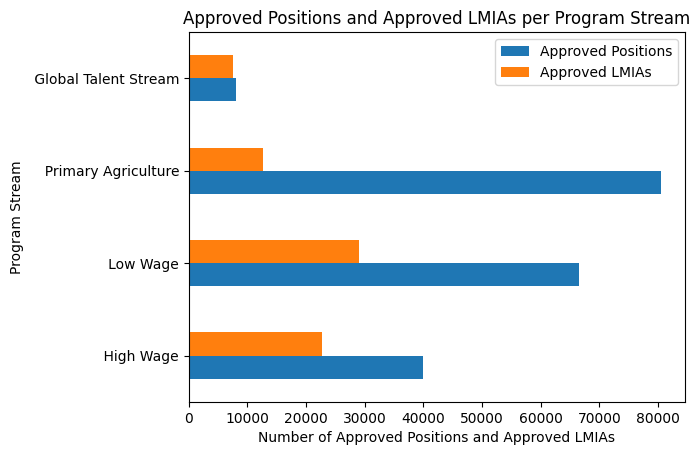

In [218]:
program_stream=df_2022.groupby('Program Stream')[['Approved Positions', 'Approved LMIAs']].sum()
program_stream.plot(kind='barh')
plt.title("Approved Positions and Approved LMIAs per Program Stream")
plt.xlabel("Number of Approved Positions and Approved LMIAs")
plt.ylabel("Program Stream")
plt.show()

In [208]:
program_stream

,Approved LMIAs,Approved Positions,Quarter
Program Stream,,,
High Wage,22744.0,39927.0,50382
Low Wage,28933.0,66495.0,69326
Primary Agriculture,12566.0,80512.0,22235
Global Talent Stream,7543.0,8023.0,8418


In [ ]:
import pandas
import plotly.express as px

# 1. Bar Plot
fig1 = px.bar(df, x='Province/Territory', y='Approved Positions', title='Approved Positions by Province/Territory')
fig1.show()

In [ ]:
# 4 Heatmap
heatmap_df = df.groupby(['Province/Territory', 'Occupation']).size().reset_index(name='Counts')
fig3 = px.density_heatmap(heatmap_df, x='Province/Territory', y='Ocupation', z='Counts', title='Ocupation Density by Province/territory')


# 

In [ ]:
import matplotlib.pyplot as plt
top_occupation=df_2022.groupby('Occupation')['Approved Positions'].sum().nlargest(10)
fig4 = px.bar(top_occupation, x='Occupation', y='Approved Positions', title='Approved Positions by Occupation')
# top_occupation.plot(kind='barh', figsize=(10,5))
# plt.show()

In [ ]:
# Top Company with Approved LMIAs
top_occupation=file[data].groupby('Employer')['Approved LMIAs'].sum().nlargest(10).reset_index()
st.dataframe(top_occupation)



In [ ]:
if selected_option == "Search":
    st.title("Search the Dataset!")
    data = st.selectbox("What data to show?", ("", "df_2022", "df_2022q4", "df_2022q3", "df_2022q2", "df_2022q1"))
    if data:
        columns = st.multiselect("What column to show?", ["Program Stream", "Province/Territory", "Employer", "Address", "Occupation", "Code", "Job Title", "Incorporate Status", "Approved LMIAs", "Approved Positions", "Quarter"])
        selections = {}
        if columns:
            for col in columns: 
                selection[col] = st.multiselect(f"Choose the value for {col}:",df[col].unique())
        if st.button("Search"):
            df_selection = df.copy()
            for col, selection in selections.items():
                df_selection = df_selection[df_selection[col].isin(selection)]
            st.dataframe(df_selection)

In [ ]:
Descriptive statistics

Unique employers 
df['Employer'].nunique())

Top 10 Employer 
top_employer = df.groupby('Employer')['Approved LMIAs'].sum().nlargest(10))
st.write(top_empoyer)

Top 5 occupations per province/territory 
top_occupations = df..groupby('Province/Territory', 'Occupation')['Approved LMIAs'].sum().reset_index()
top_occupations = top_occupations.groupby('Province/Territory').apply(lambda x: x.nlargest(5, 'Approved Positions')).reset_index(drop=True)
st.write(top_occupations)
    
LMIA percentage by program stream
lmia_percentage = df.groupby('Program Stream')['Approved LMIAs'].sum() / df['Approved LMIAs'].sum() * 100
st.write(lmia_percentage)
    
Average Approved Positions per Employer
st.write(df['Approved Positions'].mean()
    
Approved positions per quarter
st.write(df.groupby('Quarter')['Approved Positions'].sum()
    
Average LMIAs per occupation
st.write(df.groupby('Occupation')['Approved LMIAs'].mean()